Домашнее задание NetworkX

Цель: С помощью библиотеки NetworkX выполнить одно из двух заданий на выбор:
1.С использованием вконтакте API сделать анализ взаимосвязей пользователя (друзья, музыка, группы, на ваш выбор). Информация о vk api можно найти здесь: https://habr.com/ru/post/263313/
2.Проанализировать взаимосвязи передач игроков в команде НБА (команда на ваш выбор). Использовать NBA API для загрузки данных (больше информации по ссылке: http://opiateforthemass.es/articles/analyzing-golden-state-warriors-passing-network-using-graphframes-in-spark/). ID игроков и команд можно найти здесь: https://github.com/bttmly/nba/tree/master/data

In [494]:
# Я выбрал VK

# Графы. NetworkX


In [306]:
import requests
import time
import collections
from operator import itemgetter
import itertools

import matplotlib.pyplot as plt


import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout


### Соберем id всех друзей одного человека:


In [495]:
## Т.к. у меня нет аккаунта VK, я использовал данные моего родственника. Далее, для удобства, я называю его аккаунт своим.

my_id = 211261267
r = requests.get('https://api.vk.com/method/friends.get?v=5.52&access_token=33b0bc9535023b230b848f8bc53c0bc0ab661074da286c531698dc63502bcbc1776e38d305d40a27099f0&user_id=211261267')
friend_ids = r.json()['response']['items']
friend_ids


[472775,
 1182595,
 1536493,
 2385940,
 3621265,
 3818848,
 4022626,
 4023437,
 4614013,
 4714281,
 4841835,
 5248400,
 5845291,
 6228621,
 6607781,
 6895870,
 7309247,
 8058457,
 9920542,
 12598826,
 13145247,
 13450065,
 13594624,
 13711264,
 13947991,
 15691904,
 15826684,
 16603587,
 16937164,
 17055772,
 17774847,
 18750008,
 20012261,
 20232051,
 20715107,
 24305924,
 24529374,
 24594134,
 25572314,
 26732222,
 28391526,
 29479123,
 29776271,
 31198132,
 32401459,
 33113078,
 35484877,
 36453039,
 40017285,
 40779035,
 41153372,
 42497880,
 42605258,
 43885488,
 44223391,
 48339653,
 49375589,
 50003738,
 51660232,
 52487706,
 52532088,
 52901603,
 53917439,
 57782258,
 64314243,
 66969928,
 67135598,
 68216001,
 68484525,
 68606682,
 70654883,
 71479542,
 72655126,
 72701912,
 72804823,
 79281845,
 80423799,
 83913801,
 84223598,
 89261032,
 90877384,
 93541703,
 94783915,
 95934079,
 96688305,
 98997273,
 100343873,
 102952747,
 103294004,
 103903649,
 105520098,
 106571344,
 1

## Построим граф взаимосвязей всех друзей

In [198]:
def get_friends_ids(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?v=5.52&access_token=33b0bc9535023b230b848f8bc53c0bc0ab661074da286c531698dc63502bcbc1776e38d305d40a27099f0&user_id=' + str(user_id)

    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        print (json_response.get('error'))
        return []
    return json_response[u'response']['items']


In [199]:
grafs = {}
for friend_id in friend_ids:
    grafs[friend_id] = get_friends_ids(friend_id)
    

{'error_code': 15, 'error_msg': 'Access denied: this profile is private', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '2385940'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 15, 'error_msg': 'Access denied: this profile is private', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '4022626'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '4714281'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '4841835'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second',

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '44223391'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '48339653'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '49375589'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '50003738'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params':

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '118431971'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '121955558'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '125411808'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '125458570'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_para

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '266470138'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '272112271'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '272926242'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '278907086'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_para

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '512537231'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '513828647'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '514404296'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '516140087'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_para

In [200]:
grafs[friend_ids[0]]


[86890,
 102946,
 157168,
 184179,
 209390,
 225884,
 227178,
 258524,
 261644,
 313599,
 342086,
 369292,
 440941,
 441327,
 451553,
 480955,
 493190,
 497258,
 530084,
 542478,
 569847,
 576387,
 590997,
 611261,
 646319,
 655336,
 658163,
 720534,
 725903,
 784893,
 802652,
 808372,
 872807,
 876797,
 913617,
 918746,
 936166,
 958746,
 999170,
 1011966,
 1078953,
 1175450,
 1182955,
 1214861,
 1363616,
 1515909,
 1574461,
 1677674,
 1823965,
 1827926,
 1880308,
 1944339,
 2005658,
 2026851,
 2118267,
 2132968,
 2195820,
 2276217,
 2369742,
 2409562,
 2452280,
 2540371,
 2667482,
 2822637,
 2868082,
 2878692,
 2904312,
 2980810,
 3062891,
 3114693,
 3266901,
 3431410,
 3631367,
 3803472,
 3818285,
 3974466,
 3974883,
 4005870,
 4033211,
 4064584,
 4077273,
 4229963,
 4865236,
 4929002,
 5034585,
 5066347,
 5248400,
 5371208,
 5483665,
 5609088,
 5797767,
 5911645,
 6131986,
 6143226,
 6522128,
 6639816,
 7194070,
 7282340,
 7651527,
 7844385,
 8742240,
 8802844,
 11357327,
 11669124

In [201]:
# Напишем свою функцию добавления ребер, так как метод add_edge соединяет только первую вершину со второй, но не наоборот.

def my_add_edge(f_item, s_item, graph = None):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item)
    

In [202]:
my_graf = nx.Graph(directed = False)
for i in friend_ids:
    my_graf.add_node(i)
    for j in grafs[i]:
        if (i != j) and (i in friend_ids) and (j in friend_ids):
            my_add_edge(i, j, graph = my_graf)
            

## Посмотрим на основные свойства графа


In [203]:
# Количество узлов (друзей):
my_graf.number_of_nodes()


204

In [204]:
# Выведем сами узлы (id друзей): 
my_graf.nodes


NodeView((472775, 5248400, 13145247, 13711264, 33113078, 49375589, 93541703, 162584435, 207604832, 207837577, 336839562, 479418956, 512537231, 1182595, 3621265, 16937164, 266233100, 1536493, 2385940, 3818848, 4022626, 4023437, 4614013, 4714281, 4841835, 5845291, 6228621, 6607781, 6895870, 7309247, 8058457, 9920542, 12598826, 13450065, 13594624, 13947991, 15691904, 15826684, 16603587, 17055772, 17774847, 18750008, 20012261, 20232051, 29776271, 43885488, 52532088, 52901603, 64314243, 67135598, 68484525, 72804823, 80423799, 89261032, 90877384, 105520098, 113591658, 140369309, 152990644, 157101863, 187490789, 238927864, 258173241, 290622997, 501289100, 513828647, 541505076, 20715107, 24305924, 24594134, 57782258, 102952747, 140489943, 167378250, 204524230, 395204297, 24529374, 247393567, 142717299, 25572314, 158711160, 26732222, 35484877, 52487706, 71479542, 72701912, 95934079, 107553083, 112683845, 118431971, 131686339, 137573571, 158395329, 166173696, 192146763, 207387549, 233020524, 301

In [242]:
# Количество ребер (взаимосвязей, дружб):
my_graf.number_of_edges()


463

In [243]:
# Сами ребра (кто с кем дружит):
my_graf.edges


EdgeView([(472775, 5248400), (472775, 13145247), (472775, 13711264), (472775, 33113078), (472775, 49375589), (472775, 93541703), (472775, 162584435), (472775, 207604832), (472775, 207837577), (472775, 336839562), (472775, 479418956), (472775, 512537231), (13145247, 131686339), (13711264, 238927864), (33113078, 20232051), (33113078, 131686339), (207604832, 26732222), (207604832, 137573571), (479418956, 137573571), (1182595, 3621265), (1182595, 16937164), (1182595, 266233100), (3621265, 16937164), (3621265, 266233100), (4022626, 20232051), (4022626, 29479123), (4022626, 72804823), (4022626, 233020524), (4841835, 24305924), (5845291, 20232051), (5845291, 26732222), (5845291, 68484525), (5845291, 131686339), (5845291, 140369309), (5845291, 141117359), (5845291, 447967034), (5845291, 467732993), (6607781, 233020524), (6895870, 24529374), (6895870, 140489943), (6895870, 233020524), (6895870, 238927864), (17055772, 25572314), (17055772, 221703555), (17774847, 20232051), (17774847, 68484525), 

In [207]:
# Соседи (смежности):
my_graf.adj


AdjacencyView({472775: {5248400: {}, 13145247: {}, 13711264: {}, 33113078: {}, 49375589: {}, 93541703: {}, 162584435: {}, 207604832: {}, 207837577: {}, 336839562: {}, 479418956: {}, 512537231: {}}, 5248400: {472775: {}}, 13145247: {472775: {}, 131686339: {}}, 13711264: {472775: {}, 238927864: {}}, 33113078: {472775: {}, 20232051: {}, 131686339: {}}, 49375589: {472775: {}}, 93541703: {472775: {}}, 162584435: {472775: {}}, 207604832: {472775: {}, 26732222: {}, 137573571: {}}, 207837577: {472775: {}}, 336839562: {472775: {}}, 479418956: {472775: {}, 137573571: {}}, 512537231: {472775: {}}, 1182595: {3621265: {}, 16937164: {}, 266233100: {}}, 3621265: {1182595: {}, 16937164: {}, 266233100: {}}, 16937164: {1182595: {}, 3621265: {}}, 266233100: {1182595: {}, 3621265: {}}, 1536493: {}, 2385940: {}, 3818848: {}, 4022626: {20232051: {}, 29479123: {}, 72804823: {}, 233020524: {}}, 4023437: {}, 4614013: {}, 4714281: {}, 4841835: {24305924: {}}, 5845291: {20232051: {}, 26732222: {}, 68484525: {}, 

In [208]:
# И степени узлов (количество друзей у каждого человека):
list(my_graf.degree)


[(472775, 12),
 (5248400, 1),
 (13145247, 2),
 (13711264, 2),
 (33113078, 3),
 (49375589, 1),
 (93541703, 1),
 (162584435, 1),
 (207604832, 3),
 (207837577, 1),
 (336839562, 1),
 (479418956, 2),
 (512537231, 1),
 (1182595, 3),
 (3621265, 3),
 (16937164, 2),
 (266233100, 2),
 (1536493, 0),
 (2385940, 0),
 (3818848, 0),
 (4022626, 4),
 (4023437, 0),
 (4614013, 0),
 (4714281, 0),
 (4841835, 1),
 (5845291, 8),
 (6228621, 0),
 (6607781, 1),
 (6895870, 4),
 (7309247, 0),
 (8058457, 0),
 (9920542, 0),
 (12598826, 0),
 (13450065, 0),
 (13594624, 0),
 (13947991, 0),
 (15691904, 0),
 (15826684, 0),
 (16603587, 0),
 (17055772, 2),
 (17774847, 5),
 (18750008, 4),
 (20012261, 5),
 (20232051, 28),
 (29776271, 2),
 (43885488, 5),
 (52532088, 4),
 (52901603, 3),
 (64314243, 3),
 (67135598, 5),
 (68484525, 33),
 (72804823, 52),
 (80423799, 14),
 (89261032, 11),
 (90877384, 2),
 (105520098, 3),
 (113591658, 4),
 (140369309, 21),
 (152990644, 2),
 (157101863, 7),
 (187490789, 9),
 (238927864, 31),
 (2581

In [237]:
# Посмотрим на самых "дружелюбных" людей, т.е. тех, у кого больше всего друзей (ребер):

l = list(my_graf.degree)
l.sort(key = itemgetter(1), reverse = True)
print(l[:5])


[(72804823, 52), (467732993, 48), (131686339, 40), (68484525, 33), (238927864, 31)]


In [ ]:
# Мы получили 5 id самых "дружелюбных" пользователей среди моих друзей.


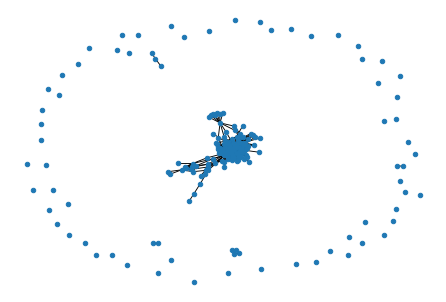

In [212]:
# Построим график взаимосвязей друзей:
nx.draw(my_graf, with_labels = False, node_size = 20, width = 0.9, font_weight = 'bold')


In [238]:
# Видим, что достаточно много людей не имеют ни одно общего друга со мной.


### Удалим друзей без общих друзей

In [220]:
friend_with_friends = [i[0] for i in list(my_graf.degree) if i[1] > 0]

my_graf_friends = nx.Graph(directed = False)

for i in friend_with_friends:
    my_graf_friends.add_node(i)
    for j in grafs[i]:
        if (i != j) and (i in friend_with_friends) and (j in friend_with_friends):
            my_add_edge(i, j, graph = my_graf_friends)
            

In [240]:
my_graf_friends.number_of_nodes()


143

In [ ]:
# Из 204 друзей, 143 имеют хотя бы одного общего друга со мной.


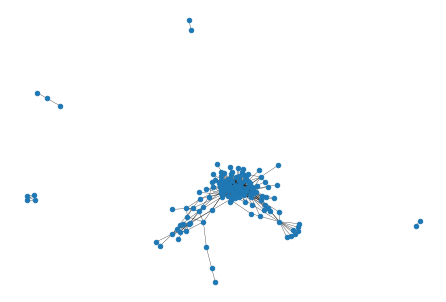

In [244]:
# Визуализируем их:
nx.draw(my_graf_friends, with_labels = False, node_size = 20, width = 0.3, font_weight = 'bold')


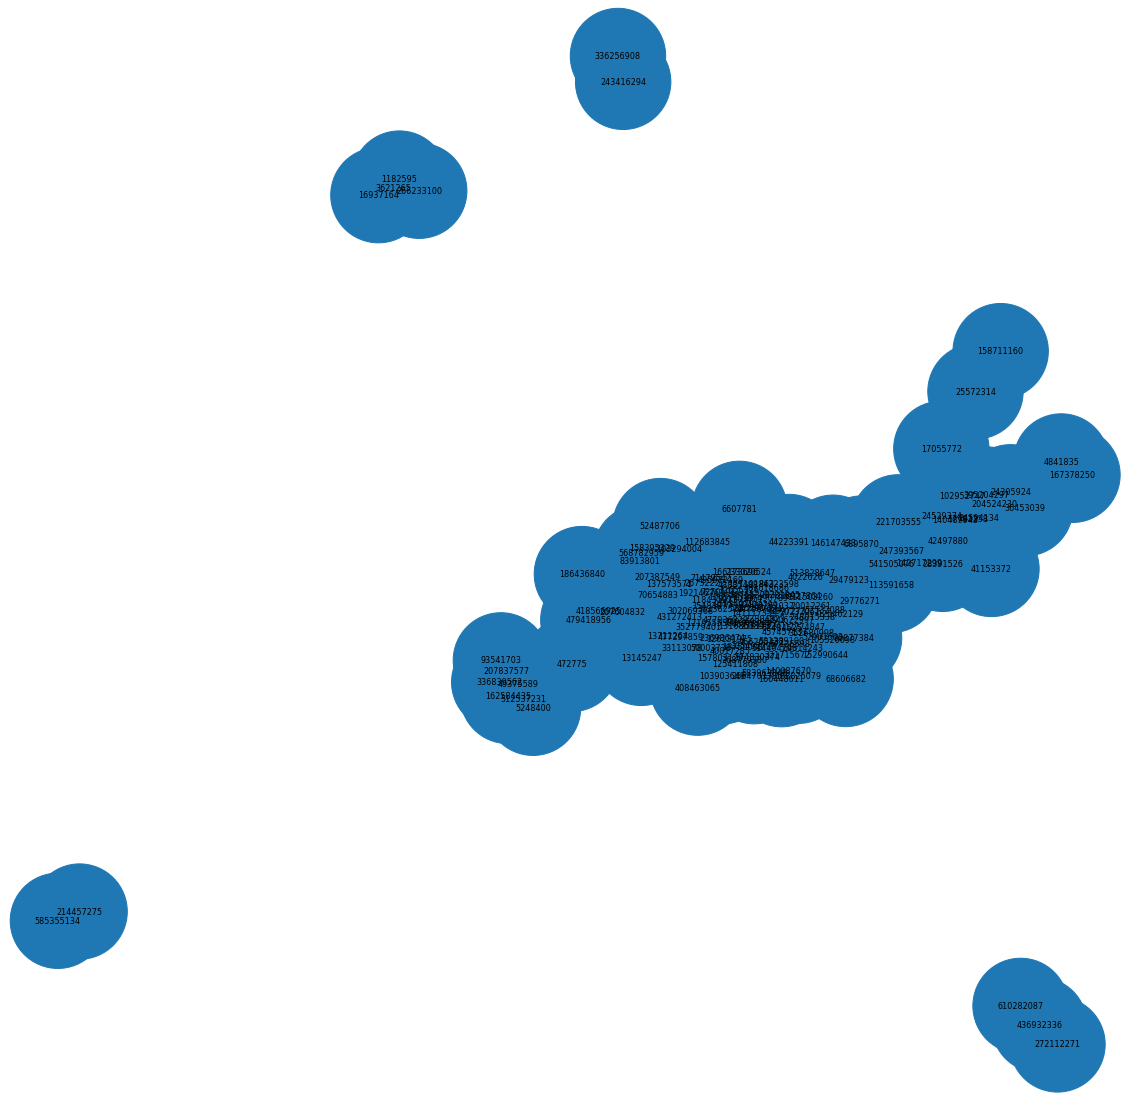

In [382]:
# Посмотрим покрупней:

members = my_graf_friends.nodes
members_count = {x:len(members[x]) for x in members}
max_value = max(members_count.values()) * 1.0
size = []
max_size = 900
min_size = 10
for node in my_graf_friends.nodes():
    size.append(((members_count[node] / max_value) * max_size + min_size) * 10)
    
pos = nx.spring_layout(my_graf_friends)
plt.figure(figsize=(20,20))
nx.draw_networkx(my_graf_friends, pos, node_size = size, width = 0.5, font_size = 8)
plt.axis('off')
plt.show()


## Обнаружение сообщества: алгоритм Гирвана-Ньюмана


In [383]:
# Сообществом будем считать Графы, которые тесно связаны между собой.
# Для этого воспользуемся алгоритмом Гирван-Ньюман, основанный на посредничестве.


In [436]:
# Алгорити реализован в библиотеке NetworkX:
comp = nx.algorithms.community.girvan_newman(my_graf_friends)
limited = itertools.takewhile(lambda c: len(c) <= 6, comp)
communities = list(limited)[-1]


In [460]:
# Посмотрим состав полученных сообществ, на которые был разбит граф:
communities


({472775,
  4022626,
  5248400,
  5845291,
  6607781,
  13145247,
  13711264,
  17774847,
  18750008,
  20012261,
  20232051,
  26732222,
  29479123,
  29776271,
  33113078,
  35484877,
  40017285,
  43885488,
  44223391,
  49375589,
  50003738,
  52487706,
  52532088,
  52901603,
  64314243,
  67135598,
  68484525,
  68606682,
  70654883,
  71479542,
  72655126,
  72701912,
  72804823,
  79281845,
  80423799,
  83913801,
  84223598,
  89261032,
  90877384,
  93541703,
  95934079,
  98997273,
  103294004,
  103903649,
  105520098,
  106571344,
  107553083,
  111503260,
  112683845,
  118431971,
  121955558,
  125411808,
  125462129,
  126131975,
  131686339,
  137573571,
  140087670,
  140369309,
  141117359,
  146147433,
  152990644,
  157101863,
  157803129,
  158395329,
  160448611,
  162584435,
  166173696,
  174830374,
  186436840,
  187490789,
  188825079,
  192146763,
  207387549,
  207604832,
  207837577,
  233020524,
  236986474,
  238927864,
  248015338,
  258173241,
  266470

In [438]:
# Добавим к каждой Вершине номер сообществ:
community_dict = {}
community_num = 0
for community in communities:
    for character in community:
        community_dict[character] = community_num
        community_num += 1
        nx.set_node_attributes(my_graf_friends, community_dict, 'community')

betweenness_dict = nx.betweenness_centrality(my_graf_friends)

nx.set_node_attributes(my_graf_friends, betweenness_dict, 'betweenness')


In [441]:
# Создадим список цветов для отрисовки
color = 0
color_map = ['red', 'blue', 'yellow', 'purple', 'black', 'green', 'pink'] * 10


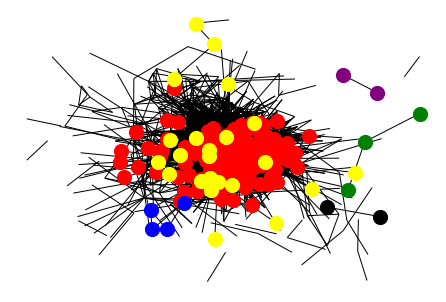

In [442]:
# Нарисуем результат:
for community in communities:
    nx.draw(my_graf_friends, pos = nx.spring_layout(my_graf_friends, iterations = 10), 
            nodelist = community, node_size = 200, node_color = color_map[color])
    color += 1
plt.savefig('./game.png')


In [443]:
# Какая-то аляпистая картинка получилась, увеличим количество итераций:


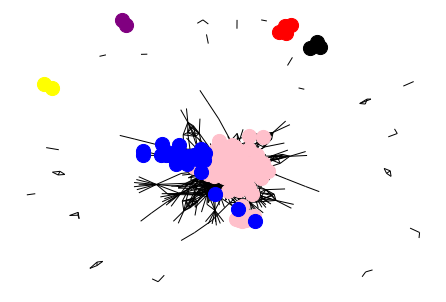

In [444]:
for community in communities:
    nx.draw(my_graf_friends, pos = nx.spring_layout(my_graf_friends, iterations = 50), 
            nodelist = community, node_size = 200, node_color = color_map[color])
    color += 1
plt.savefig('./game.png')


In [445]:
# Лучше, но много не попало

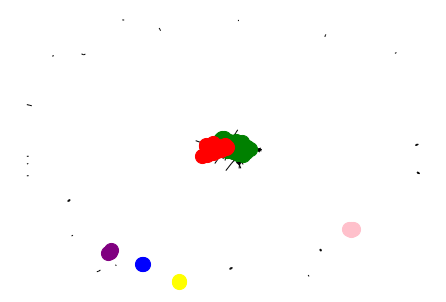

In [446]:
for community in communities:
    nx.draw(my_graf_friends, pos = nx.spring_layout(my_graf_friends, iterations = 200),
            nodelist = community, node_size = 200, node_color = color_map[color])
    color += 1
plt.savefig('./game.png')


In [447]:
# Как видим только при большом количестве итераций (iterations) появляется какая-то вменяемая картинка.


# Сгруппируем людей по сообществам, на которые они подписаны


In [222]:
def get_users_group(user_id):
    friends_url = 'https://api.vk.com/method/groups.get?v=5.52&access_token=33b0bc9535023b230b848f8bc53c0bc0ab661074da286c531698dc63502bcbc1776e38d305d40a27099f0&user_id=' + str(user_id)

    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        print (json_response.get('error'))
        return []
    return json_response[u'response']['items']


In [223]:
graf_groups = {}
for friend_id in friend_ids:
    graf_groups[friend_id] = get_users_group(friend_id)


{'error_code': 15, 'error_msg': 'Access denied: this profile is private', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '2385940'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 15, 'error_msg': 'Access denied: this profile is private', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '4022626'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '4714281'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '4841835'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 're

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '42605258'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '43885488'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '44223391'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '48339653'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '109900607'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '111503260'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '112683845'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '113591658'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params':

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '202870442'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '204524230'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '247393567'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '248015338'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params':

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '495972169'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '501289100'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '508436937'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'v', 'value': '5.52'}, {'key': 'user_id', 'value': '512537231'}, {'key': 'method', 'value': 'groups.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params':

In [224]:
len(graf_groups)


204

In [225]:
elist = []

for friend_id in friend_ids:
    for friend_2_id in friend_ids:
        if friend_2_id != friend_id:
            weight = 0
            for ids_group in graf_groups[friend_id]:
                if ids_group in graf_groups[friend_2_id]:
                    weight += 1
            if weight > 0:
                elist.append((str(friend_id), str(friend_2_id), weight))
elist


[('472775', '20012261', 1),
 ('472775', '25572314', 1),
 ('472775', '67135598', 1),
 ('472775', '125462129', 1),
 ('472775', '221703555', 1),
 ('1182595', '1536493', 2),
 ('1182595', '3621265', 3),
 ('1182595', '3818848', 1),
 ('1182595', '4614013', 2),
 ('1182595', '18750008', 2),
 ('1182595', '20012261', 1),
 ('1182595', '20232051', 1),
 ('1182595', '24529374', 1),
 ('1182595', '25572314', 2),
 ('1182595', '26732222', 1),
 ('1182595', '68216001', 1),
 ('1182595', '68484525', 1),
 ('1182595', '70654883', 1),
 ('1182595', '125458570', 1),
 ('1182595', '125462129', 2),
 ('1182595', '131686339', 2),
 ('1182595', '137573571', 1),
 ('1182595', '207604832', 2),
 ('1182595', '207837577', 2),
 ('1182595', '214457275', 4),
 ('1182595', '221703555', 1),
 ('1182595', '236986474', 1),
 ('1182595', '238927864', 2),
 ('1182595', '418566925', 1),
 ('1182595', '428337184', 1),
 ('1182595', '447967034', 2),
 ('1536493', '1182595', 2),
 ('1536493', '3621265', 1),
 ('1536493', '4614013', 1),
 ('1536493'

In [226]:
my_graf_groups = nx.Graph()
my_graf_groups.add_weighted_edges_from(elist)


In [227]:
my_graf_groups.degree


DegreeView({'472775': 5, '20012261': 29, '25572314': 33, '67135598': 30, '125462129': 29, '221703555': 27, '1182595': 26, '1536493': 10, '3621265': 13, '3818848': 15, '4614013': 17, '18750008': 28, '20232051': 26, '24529374': 17, '26732222': 24, '68216001': 9, '68484525': 26, '70654883': 24, '125458570': 24, '131686339': 26, '137573571': 23, '207604832': 24, '207837577': 31, '214457275': 19, '236986474': 28, '238927864': 32, '418566925': 27, '428337184': 16, '447967034': 31, '436932336': 5, '24594134': 19, '408463065': 26, '20715107': 23, '233020524': 23, '431272413': 17, '24305924': 4, '125481440': 4})

In [228]:
my_graf_groups.number_of_nodes()


37

In [259]:
# Получается, что всего у 37 друзей есть хотя бы по одной одинаковой группе в подписках


In [229]:
my_graf_groups.number_of_edges()


395

In [230]:
my_graf_groups.adj


AdjacencyView({'472775': {'20012261': {'weight': 1}, '25572314': {'weight': 1}, '67135598': {'weight': 1}, '125462129': {'weight': 1}, '221703555': {'weight': 1}}, '20012261': {'472775': {'weight': 1}, '1182595': {'weight': 1}, '3818848': {'weight': 1}, '4614013': {'weight': 3}, '18750008': {'weight': 4}, '20232051': {'weight': 12}, '20715107': {'weight': 1}, '24594134': {'weight': 3}, '25572314': {'weight': 16}, '26732222': {'weight': 13}, '67135598': {'weight': 9}, '68484525': {'weight': 15}, '70654883': {'weight': 6}, '125458570': {'weight': 4}, '125462129': {'weight': 8}, '131686339': {'weight': 12}, '137573571': {'weight': 4}, '207604832': {'weight': 2}, '207837577': {'weight': 2}, '214457275': {'weight': 1}, '221703555': {'weight': 8}, '233020524': {'weight': 11}, '236986474': {'weight': 11}, '238927864': {'weight': 19}, '408463065': {'weight': 8}, '418566925': {'weight': 11}, '428337184': {'weight': 2}, '431272413': {'weight': 3}, '447967034': {'weight': 20}}, '25572314': {'4727

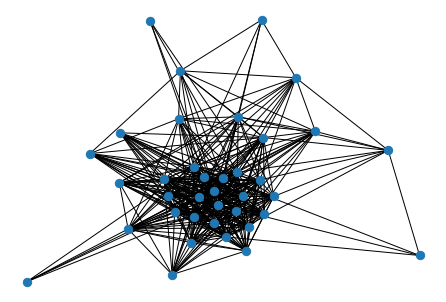

In [231]:
# Построим графы 
nx.draw(my_graf_groups, pos = nx.spring_layout(my_graf_groups), node_size = 70, nodecolor='r')


In [133]:
# На данном графике длинна ребра обратно пропорциональна силы связи Контактов. 
# Т.е. чем бОльшее количество одинаковых групп у Контактов, тем короче ребро между ними.


In [258]:
# Посмотрим на людей, у которых больше всего "совмещений" с ходя бы одним пересечением по подписанным группам:
l = list(my_graf_groups.degree)
l.sort(key=itemgetter(1), reverse = True)
print(l)


[('25572314', 33), ('238927864', 32), ('207837577', 31), ('447967034', 31), ('67135598', 30), ('20012261', 29), ('125462129', 29), ('18750008', 28), ('236986474', 28), ('221703555', 27), ('418566925', 27), ('1182595', 26), ('20232051', 26), ('68484525', 26), ('131686339', 26), ('408463065', 26), ('26732222', 24), ('70654883', 24), ('125458570', 24), ('207604832', 24), ('137573571', 23), ('20715107', 23), ('233020524', 23), ('214457275', 19), ('24594134', 19), ('4614013', 17), ('24529374', 17), ('431272413', 17), ('428337184', 16), ('3818848', 15), ('3621265', 13), ('1536493', 10), ('68216001', 9), ('472775', 5), ('436932336', 5), ('24305924', 4), ('125481440', 4)]


In [ ]:
# Получается: пользователь с id=25572314 имеет пересечений с бОльшим количеством людей, чем все остальные.


## Посмотрим на сообщества через алгоритм Гирвана-Ньюмана


In [422]:
comp_group = nx.algorithms.community.girvan_newman(my_graf_groups)
limited = itertools.takewhile(lambda c: len(c) <= 4, comp_group)
communities_group = list(limited)[-1]


In [423]:
# Добавим к каждой Вершине номер сообществ:
community_dict_group = {}
community_group_num = 0
for community in communities_group:
    for character in community:
        community_dict_group[character] = community_group_num
        community_group_num += 1
        nx.set_node_attributes(my_graf_groups, community_dict_group, 'community')

betweenness_dict = nx.betweenness_centrality(my_graf_groups)

nx.set_node_attributes(my_graf_groups, betweenness_dict, 'betweenness')


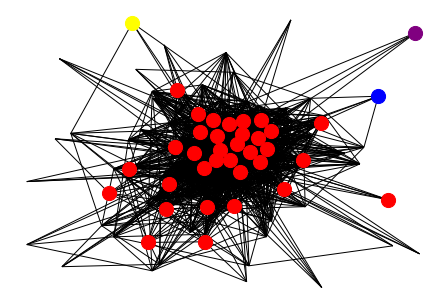

In [424]:
for community in communities_group:
    nx.draw(my_graf_groups, pos = nx.spring_layout(my_graf_groups, iterations = 200),
            nodelist = community, node_size = 200, node_color = color_map[color])
    color += 1
plt.savefig('./game.png')


In [448]:
# По графику видна, что те 37 человек, которые подписаны хотя бы на одну одинаковую группу, 
# достаточно плотны и выделить среди них какие-то кластеры не представляется целесообразным.


In [459]:
lis_groups = tuple(sorted(c) for c in next(comp))
lis_groups


([472775,
  5248400,
  13145247,
  13711264,
  49375589,
  93541703,
  162584435,
  207837577,
  336839562,
  479418956,
  512537231],
 [4022626,
  5845291,
  17774847,
  18750008,
  20012261,
  20232051,
  26732222,
  29479123,
  29776271,
  33113078,
  35484877,
  40017285,
  43885488,
  44223391,
  50003738,
  52487706,
  52532088,
  52901603,
  64314243,
  67135598,
  68484525,
  70654883,
  71479542,
  72655126,
  72701912,
  72804823,
  79281845,
  80423799,
  83913801,
  84223598,
  89261032,
  90877384,
  95934079,
  98997273,
  103294004,
  103903649,
  105520098,
  106571344,
  107553083,
  111503260,
  112683845,
  118431971,
  121955558,
  125411808,
  125462129,
  126131975,
  131686339,
  137573571,
  140087670,
  140369309,
  141117359,
  152990644,
  157101863,
  157803129,
  158395329,
  160448611,
  166173696,
  174830374,
  186436840,
  187490789,
  188825079,
  192146763,
  207387549,
  207604832,
  233020524,
  236986474,
  238927864,
  248015338,
  258173241,
  26

In [452]:
# Посмотрим в каких кластерах находятся эти 37 человек:
list(my_graf_groups.nodes)


['472775',
 '20012261',
 '25572314',
 '67135598',
 '125462129',
 '221703555',
 '1182595',
 '1536493',
 '3621265',
 '3818848',
 '4614013',
 '18750008',
 '20232051',
 '24529374',
 '26732222',
 '68216001',
 '68484525',
 '70654883',
 '125458570',
 '131686339',
 '137573571',
 '207604832',
 '207837577',
 '214457275',
 '236986474',
 '238927864',
 '418566925',
 '428337184',
 '447967034',
 '436932336',
 '24594134',
 '408463065',
 '20715107',
 '233020524',
 '431272413',
 '24305924',
 '125481440']

In [486]:
ind_group = []
for i in list(my_graf_groups.nodes):
    for k in range(len(lis_groups)):
        if int(i) in lis_groups[k]:
            ind_group.append(k)
            break

len(ind_group)


29

In [ ]:
# Получилось, что не все друзья с хотя бы одной общей группой имеют хотя бы одного общего друга со мной.
# И таких 8 человек: 37-29

In [491]:
# Посморим на встречающиеся кластеры:
set(ind_group)


{0, 1, 2, 3, 7, 8, 10}

In [492]:
# И количество участников в них:
sl = {}
for j in ind_group:
    if j in sl:
        sl[j] = sl[j] + 1
    else:
        sl[j] = 1
sl


{0: 2, 1: 17, 3: 5, 2: 2, 8: 1, 10: 1, 7: 1}

In [493]:
# Как видим бОльшая часть друзей (17 человек) находятся в одном кластере.
# Это, скорей всего, говорит, что данные 17 человек бОлее дружны (имеют больше общих друзей) 
# и подписаны на одни и те же группы.
